## Introduction

The MIMIC-III database (version 1.4, 2016) is a publicly available critical care database containing de-identified data on 46,520 patients and 58,976 admissions to the ICU of the Beth Israel Deaconess Medical Center, Boston, USA, between 1 June, 2001 and 31 October, 2012. 

## Following are some the questions I intended to solve with this analysis:

1. Which age group is most in the hospital?
2. What is the number of people who died and who survived?
3. Which age group of patients have the largest death rate?
4. What is the percentage of genders in the hospital and deaths per gender?
5. What is the percentage of deaths due to some of the diseases?

In [1]:
# Importing all the important libraries
import pandas as pd # CSV handling
import numpy as np # Linear algebra
import matplotlib.pyplot as plt # Plot customization
import seaborn as sns # Handy plotting functions
%matplotlib inline

# Supress all warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # Show all the columns
pd.set_option('display.max_rows', None) # Show all the rows

In [2]:
df = pd.read_csv('data.csv')
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [3]:
num_rows, num_cols = df.shape
print(f'Rows = {num_rows}, Columns = {num_cols}')

Rows = 1177, Columns = 51


In [4]:
null_vals = df.isna().sum()
pd.DataFrame([df.dtypes, null_vals*100/num_rows], index=['dtypes', '% null values'])

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
dtypes,int64,int64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
% null values,0.0,0.0,0.084962,0.0,0.0,18.26678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.104503,1.359388,1.359388,1.104503,1.614274,1.104503,3.058624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.234494,22.005098,12.319456,1.699235,1.699235,0.0,14.018692,0.0,0.0,1.529312,0.0,0.0,0.084962,0.0,0.0,0.0,24.808836,0.0,19.456245,24.97876,0.0


The columns - *group* and *ID* - are just for identification purpose so I have dropped them. I have also dropped all the rows where the *outcome* column has a missing value since the *outcome* column is the target for model building.

In [5]:
# Dropping group and ID columns and all rows in outcome column having missing value
df.drop(['group','ID'], axis=1, inplace=True)
df.dropna(axis=0, subset=['outcome'], inplace=True)

# Resetting the index of the dataframe as some rows might have been dropped
df.reset_index(drop=True, inplace=True)

Since there are no columnn with significant % of missing values, we will impute the missing values in each column with their median. The median is used for imputing because it is independent of outliers.

In [6]:
# Imputing all the missing values with their median because it is unafected by outliers
df.fillna(df.median().to_dict(), inplace=True)

In [7]:
# Simple statistics about all the column in our dataset
df.describe()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,0.135204,74.047619,1.525510,29.846932,0.717687,0.451531,0.085884,0.420918,0.339286,0.119048,0.380102,0.364796,0.075680,84.566001,117.971224,59.520811,20.797132,36.676880,96.274731,1892.601616,31.910614,3.574702,29.539803,32.864584,89.902561,15.952854,10.715043,241.517507,80.403771,0.382409,12.014964,17.437939,1.620518,11011.039612,224.851103,1.640661,36.293574,148.617329,4.176425,138.897009,8.501787,102.292048,13.923755,2.120286,7.378895,26.912116,1.804292,44.903693,48.710034
std,0.342087,13.437241,0.499561,8.465107,0.450316,0.497857,0.280312,0.493917,0.473668,0.323982,0.485618,0.481578,0.264598,15.936989,17.257678,10.616945,3.982728,0.602896,2.286308,1253.850105,5.203007,0.627013,2.620164,1.402871,6.535267,2.132405,5.231133,113.167844,10.462126,0.413113,8.107366,7.334068,0.828096,13153.830715,1378.108149,1.277996,21.860208,51.141815,0.414943,4.146172,0.571440,5.334562,2.653463,0.251608,0.058396,5.169696,0.888894,11.067475,12.872604
min,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,0.000000,65.000000,1.000000,25.274510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.535035,105.490385,52.286102,17.954237,36.287037,95.000000,997.250000,28.154375,3.120000,28.250000,32.008333,86.250000,14.459286,7.436250,168.904040,76.437500,0.200000,7.100000,13.195833,1.142857,2250.000000,51.000000,0.940000,20.833333,114.000000,3.900000,136.666667,8.150000,99.000000,12.250000,1.955556,7.350000,23.452020,1.300000,39.000000,40.000000
50%,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.795455,3.489286,29.752778,32.988312,90.000000,15.506696,9.683750,222.666667,82.469048,0.300000,10.466667,14.636667,1.300000,5837.750000,89.500000,1.285417,30.611111,136.400000,4.114835,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,0.000000,85.000000,2.000000,32.104250,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.613929,128.489286,65.409759,23.366983,37.016534,97.894608,2475.000000,35.003125,3.900000,31.240000,33.825000,93.857143,16.939236,12.743889,304.278409,86.600000,0.400000,14.700000,18.686607,1.714881,14980.750000,162.387500,1.894643,45.255682,169.000000,4.400000,141.600000,8.869063,105.571429,15.404167,2.241964,7.410000,29.881250,2.002273,47.275974,55.000000
max,1.000000,99.000000,2.0000

Creating a correlation heatmap of the comorbidities with dependent variable. This will let us know which two diseases are more correlated and also how is the relation between death and a given disease.

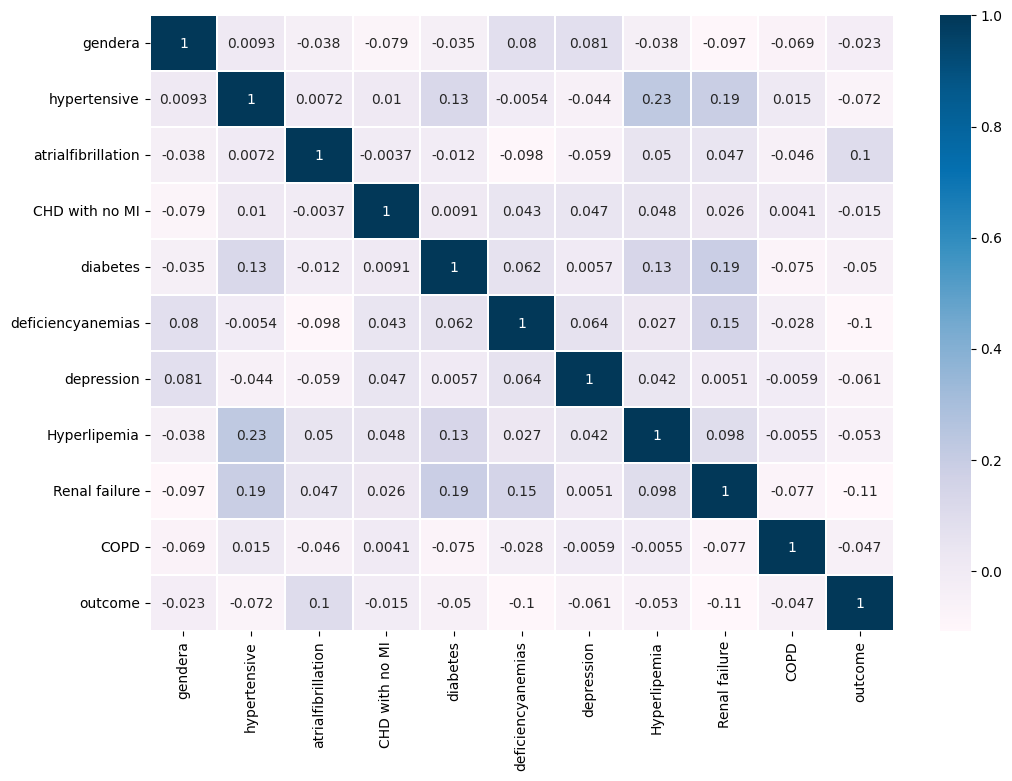

In [8]:
cols = [
    'gendera',
    'hypertensive',
    'atrialfibrillation',
    'CHD with no MI',
    'diabetes',
    'deficiencyanemias',
    'depression',
    'Hyperlipemia',
    'Renal failure',
    'COPD',
    'outcome'
]

corr = df[cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='PuBu', linewidths=0.01, linecolor="white")
plt.show()

### 1. Which age group is most in the hospital?

To do this, I have created a barplot of the frequency distriution of age of patients. The age corresponding to longest bar will then be the answer.

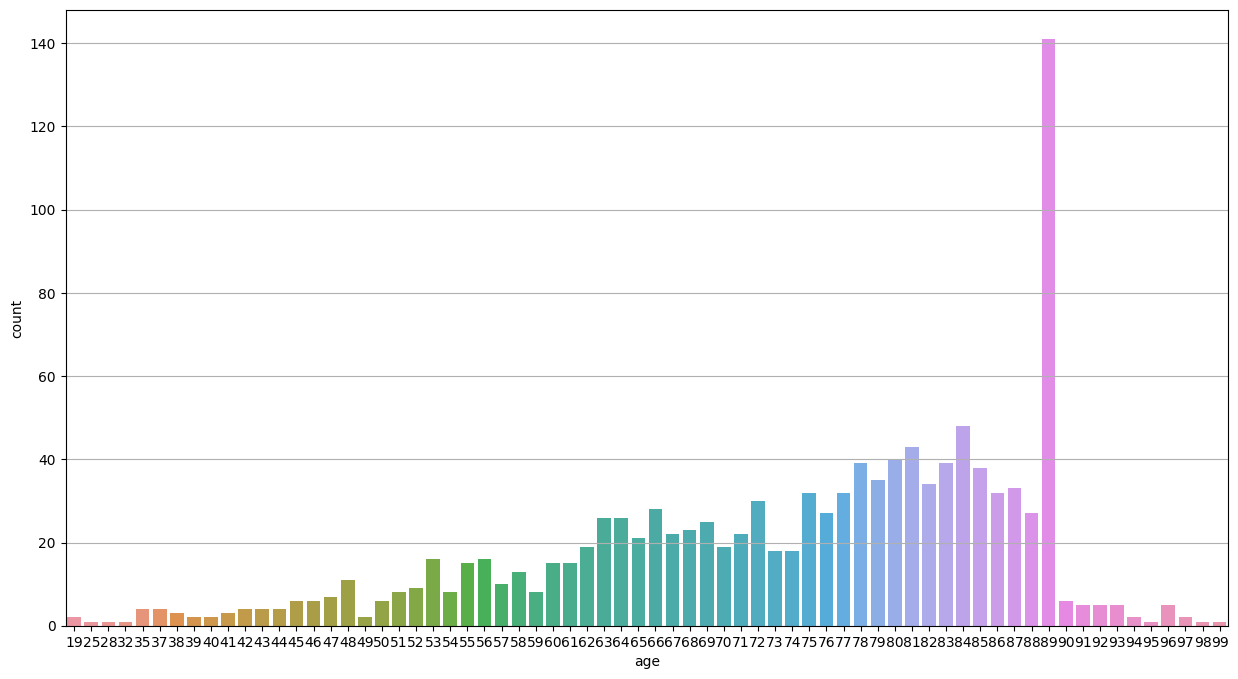

In [9]:
age_dist = df['age'].value_counts()
age_dist = age_dist.reset_index()
age_dist.columns = ['age', 'count']

plt.figure(figsize=(15, 8))
plt.grid()
sns.barplot(age_dist, x='age', y='count')
plt.show()

In [10]:
age_dist.head()

,age,count
0,89,141
1,84,48
2,81,43
3,80,40
4,78,39


**Conclusion:** Here we can see that patients with age of 89 are most in the hospital.

### 2. What is the number of people who died and who survived?

I have created a simple pie-chart to find out this statistic.

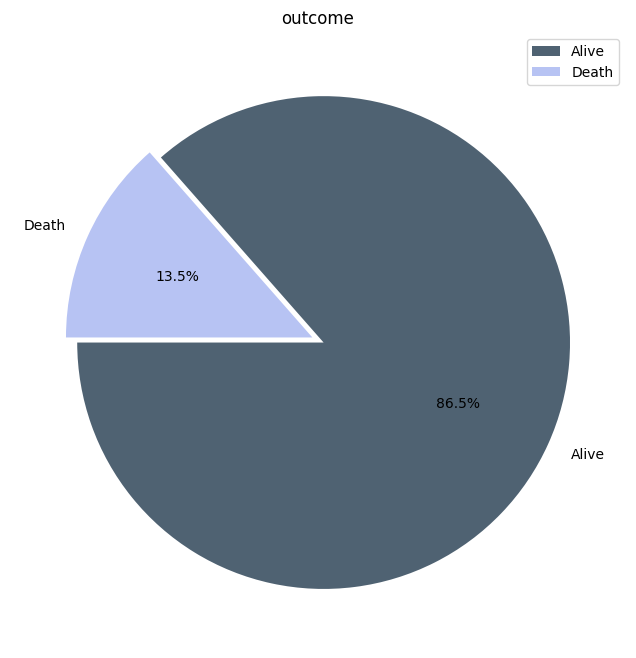

In [11]:
plt.figure(figsize=(12,8))
plt.title("outcome")
plt.pie(
    df.outcome.value_counts(),
    explode=(0.025, 0.025),
    labels=['Alive','Death'],
    colors=['#4F6272', '#B7C3F3'],
    autopct='%1.1f%%',
    startangle=180
)
plt.legend()
plt.show()

**Conclusion:** More then 13% patients died in the hospital while the remaining survived.

### 3. Which age group of patients have the largest most deaths?

I have grouped by *age* and then used the sum aggregation function on the *outcome* column. This will give me the total nunber of deaths per age group.

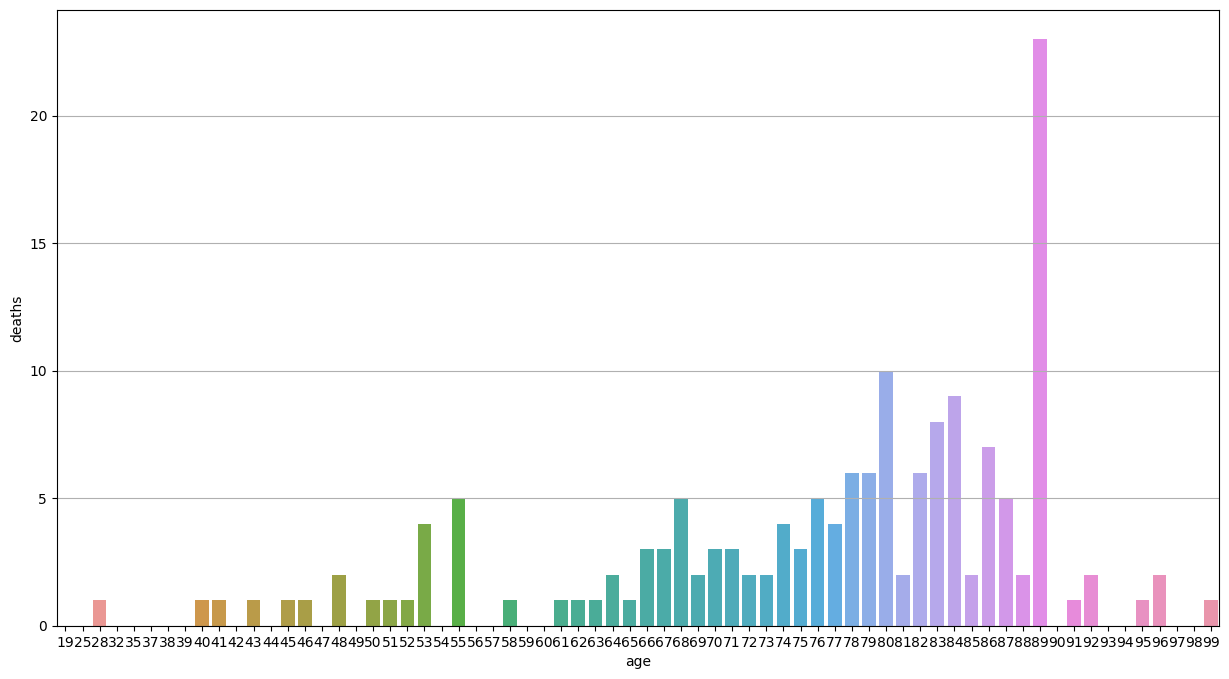

In [12]:
num_deaths = df.groupby('age')['outcome'].sum()
num_deaths = num_deaths.reset_index()
num_deaths.columns = ['age', 'deaths']

plt.figure(figsize=(15, 8))
plt.grid()
sns.barplot(num_deaths, x='age', y='deaths')
plt.show()

**Conclusion:** Patients having age 89 have the most number of deaths.

### 4. What is the percentage of genders in the hospital and deaths per gender?

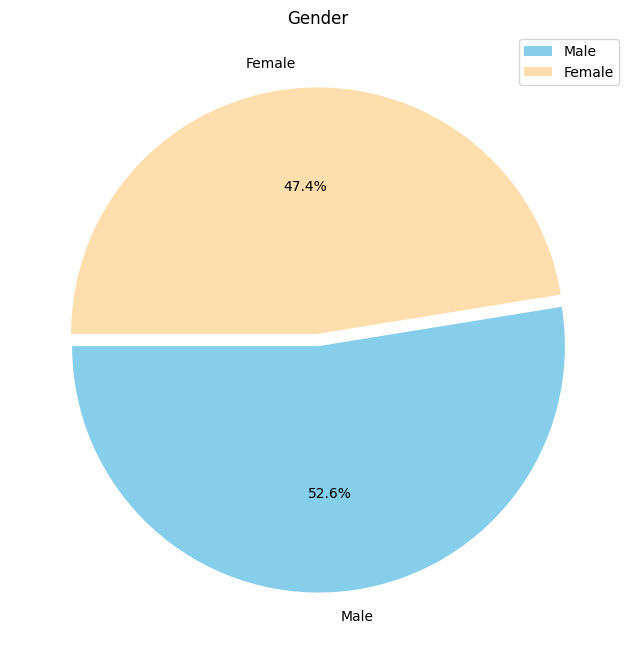

In [13]:
plt.figure(figsize=(12,8))
plt.title("Gender")
plt.pie(
    df.gendera.value_counts(),
    explode=(0.025, 0.025),
    labels=['Male','Female'],
    colors=['skyblue','navajowhite'],
    autopct='%1.1f%%',
    startangle=180
)
plt.legend()
plt.show()

**Conclusion:** There are almost equal number of patients of both the genders.

### 5. What is the percentage of deaths due to some of the diseases?

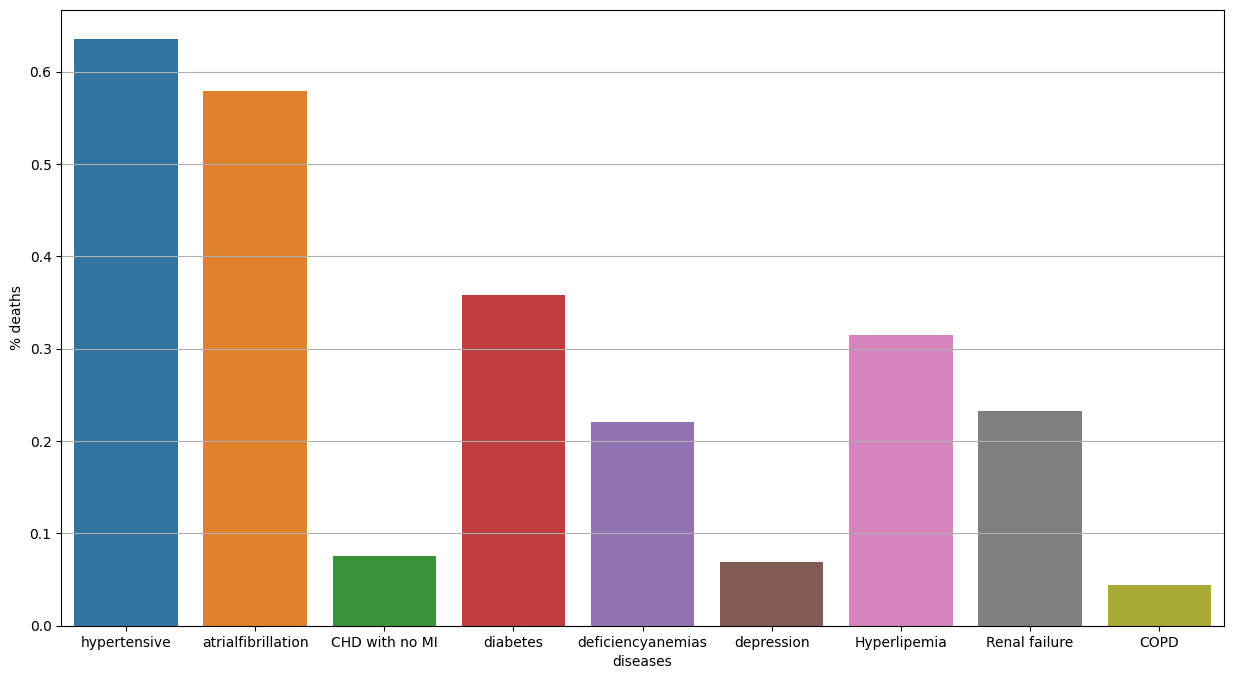

In [14]:
diseases = [
    'hypertensive',
    'atrialfibrillation',
    'CHD with no MI',
    'diabetes',
    'deficiencyanemias',
    'depression',
    'Hyperlipemia',
    'Renal failure',
    'COPD'
]

temp = df[df['outcome'] == 1].groupby('outcome')[diseases].sum()
temp /= len(df[df['outcome'] == 1])
temp = temp.reset_index(drop=True).T.reset_index()
temp.columns = ['diseases', '% deaths']

plt.figure(figsize=(15, 8))
plt.grid()
sns.barplot(temp, x='diseases', y='% deaths')
plt.show()

**Conclusion:** Clearly, a lot of deaths were due to hypertension, atrial fibrilation and diabetes. However, this does not signify the independent contribution of a particular dieases to the outcome of a patient. The reason is that many patients in this dataset had more than one disease.